# Publication figures for competition use case - Multiome data
Present results as ranks instead of absolute values.

Per metric, mean across 5 random seeds per model. Overall mean: mean across means of individual metrics.

Anaconda environment: export_styled_dfs


With matplotlib backend,  currently dataframe_image cannot export captions, vertical lines and the label of the top column header gets duplicated -> manual postprocessing in Keynote. 

Hack: renaming asw_batch to lLISI so iLISI and asw_batch take up the same width. In postprocessing lLISI will be named back to the correct asw_batch.

Abbreviation: Competition use case mosaic: CU_mosaic

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import matplotlib.font_manager as fm
import dataframe_image as dfi

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.size'] = '12'

In [4]:
! rm ~/.cache/matplotlib -rf

In [5]:
font_dirs = ["miniconda3/envs/scib_v1.0.1_min/fonts"]  # The path to the custom font file.
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [6]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [7]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [8]:
plt.rcParams['figure.figsize'] = [6.0*4/5, 4.0*4/5]

In [9]:
plt.rcParams['font.size']

12.0

# Multiome



In [10]:
scores = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_liam_mosaic_b_seed_94.csv", index_col=0)

In [11]:
scores_part2 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_MultiVI_mosaic_b_seed_94.csv", index_col=0)

In [12]:
scores_r1 = pd.read_csv("./../Evaluation/scores/Multiome/batch_removal_scores_adversary_range_revisons_r1_20232410.csv", index_col=0)

In [13]:
scores = pd.concat([scores, scores_part2, scores_r1], axis=1)


In [14]:
scores

,liam_mosaic_full_seed_8831,liam_mosaic_full_seed_234,liam_mosaic_full_seed_11,liam_mosaic_full_seed_9631,liam_mosaic_full_seed_94,liam_mosaic_a_seed_8831,liam_mosaic_a_seed_234,liam_mosaic_a_seed_11,liam_mosaic_a_seed_9631,liam_mosaic_a_seed_94,...,liam_mosaic_a_x25.0_seed_8831,liam_mosaic_a_x25.0_seed_234,liam_mosaic_a_x25.0_seed_11,liam_mosaic_a_x25.0_seed_9631,liam_mosaic_a_x25.0_seed_94,liam_mosaic_b_x25.0_seed_8831,liam_mosaic_b_x25.0_seed_234,liam_mosaic_b_x25.0_seed_11,liam_mosaic_b_x25.0_seed_9631,liam_mosaic_b_x25.0_seed_94
dims,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
iLISI_batch,0.298464,0.300841,0.302838,0.301753,0.299309,0.303042,0.301412,0.304641,0.306182,0.302276,...,0.299010,0.294806,0.273014,0.284637,0.292310,0.278962,0.271425,0.285171,0.289508,0.272549
cLISI_full,0.992914,0.993078,0.992879,0.992683,0.992469,0.987855,0.987653,0.987701,0.987608,0.988048,...,0.981149,0.981860,0.981143,0.980408,0.980807,0.986189,0.985297,0.984602,0.985871,0.986066
asw_batch,0.851811,0.857586,0.848320,0.843707,0.851856,0.853206,0.857527,0.857801,0.863344,0.863526,...,0.846937,0.856476,0.856620,0.843863,0.851212,0.867935,0.869033,0.873803,0.868500,0.870618
asw_label,0.594102,0.592290,0.593075,0.601125,0.590144,0.577736,0.583619,0.578521,0.577666,0.576237,...,0.555620,0.557700,0.560244,0.558055,0.561624,0.564819,0.560262,0.557956,0.559024,0.560549
cc_cons,0.731220,0.752131,0.759978,0.794103,0.738942,0.694911,0.669956,0.707157,0.773926,0.764429,...,0.703451,0.730799,0.637568,0.627067,0.730240,0.733578,0.795298,0.739965,0.776013,0.760827
graph_conn,0.953200,0.953532,0.946699,0.947096,0.949255,0.902347,0.914446,0.905031,0.903189,0.903491,...,0.877818,0.894488,0.890610,0.894220,0.898090,0.939036,0.917916,0.938887,0.937307,0.947388
nmi,0.755439,0.751067,0.750971,0.759307,0.751954,0.721396,0.719708,0.716455,0.712456,0.723877,...,0.665358,0.676115,0.673590,0.649857,0.657552,0.733915,0.730175,0.723434,0.718187,0.721360
ti_cons_batch_gex,0.965786,0.958634,0.966282,0.966262,0.964830,0.955040,0.944929,0.932563,0.951964,0.950863,...,0.941794,0.947573,0.945044,0.382171,0.947293,0.892841,0.896711,0.889674,0.896127,0.875634
ti_cons_batch_adt_atac,0.853426,0.857930,0.854968,0.857044,0.852883,0.856084,0.849312,0.847849,0.853854,0.853482,...,0.847988,0.851843,0.848812,0.386108,0.847280,0.828554,0.811596,0.818356,0.821283,0.812661


In [15]:
# scores.to_csv('Evaluation/scores/Multiome/batch_removal_scores_all_models_manually_combined.csv')

In [16]:
scores.rename(index={"asw_batch": "asw_batch_sample", "asw_site": "asw_batch_site", "iLISI_batch": "iLISI_sample", "ti_cons_batch_mean": "ti_cons"}, inplace=True)

<Axes: >

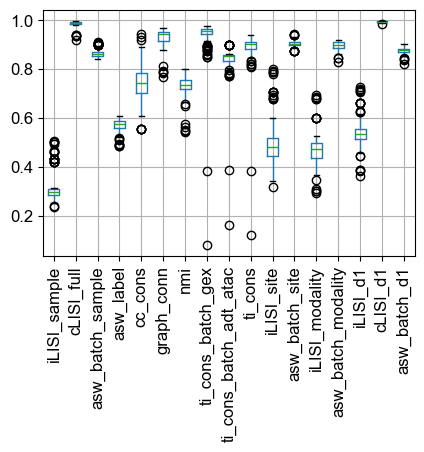

In [17]:
scores.drop("dims").T.boxplot(rot=90)

In [18]:
scores = scores.T

In [19]:
scores['Model'] = scores.index

In [20]:
scores['seed'] = scores.index

In [21]:
scores['seed'] = scores['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])

In [22]:
def map_names(x):
    return 'liam (x1) mosaic full' if 'liam_mosaic_full_x1.0' in x else \
                                   'liam (x10) mosaic full' if 'liam_mosaic_full_x10.0' in x else \
                                   'liam (x25) mosaic full' if 'liam_mosaic_full_x25.0' in x else \
                                   'liam (x1) mosaic a' if 'liam_mosaic_a_x1.0' in x else \
                                   'liam (x10) mosaic a' if 'liam_mosaic_a_x10.0' in x else \
                                   'liam (x25) mosaic a' if 'liam_mosaic_a_x25.0' in x else \
                                   'liam (x1) mosaic b' if 'liam_mosaic_b_x1.0' in x else \
                                   'liam (x10) mosaic b' if 'liam_mosaic_b_x10.0' in x else \
                                   'liam (x25) mosaic b' if 'liam_mosaic_b_x25.0' in x else \
                                   'liam (x5) mosaic full' if 'liam_mosaic_full' in x else \
                                   'liam (x5) mosaic atac a' if 'liam_mosaic_atac_a' in x else \
                                   'liam (x5) mosaic rest a' if 'liam_mosaic_rest_a' in x else \
                                   'liam (x5) mosaic atac b' if 'liam_mosaic_atac_b' in x else \
                                   'liam (x5) mosaic rest b' if 'liam_mosaic_rest_b' in x else \
                                   'liam (x5) mosaic a' if 'liam_mosaic_a' in x else \
                                   'liam (x5) mosaic b' if 'liam_mosaic_b' in x else \
                                   'liam (x5) paired full' if 'liam_paired_full' in x else \
                                   'MultiVI mosaic full' if 'MultiVI_mosaic_full' in x else \
                                   'MultiVI mosaic a' if 'MultiVI_mosaic_a' in x else \
                                   'MultiVI mosaic b'

In [23]:
scores['Model'] = scores.index.map(lambda x:
                                   map_names(x))

In [24]:
scores['Model'].value_counts()

Model
liam (x5) mosaic full      5
liam (x5) mosaic a         5
liam (x5) mosaic b         5
liam (x5) mosaic atac a    5
liam (x5) mosaic rest a    5
liam (x5) mosaic atac b    5
liam (x5) mosaic rest b    5
liam (x5) paired full      5
MultiVI mosaic full        5
MultiVI mosaic a           5
MultiVI mosaic b           5
liam (x1) mosaic full      5
liam (x1) mosaic a         5
liam (x1) mosaic b         5
liam (x10) mosaic full     5
liam (x10) mosaic a        5
liam (x10) mosaic b        5
liam (x25) mosaic full     5
liam (x25) mosaic a        5
liam (x25) mosaic b        5
Name: count, dtype: int64

In [25]:
print(scores.groupby('Model')['seed'].value_counts().to_string())

Model                    seed
MultiVI mosaic a         11      1
                         234     1
                         8831    1
                         94      1
                         9631    1
MultiVI mosaic b         11      1
                         234     1
                         8831    1
                         94      1
                         9631    1
MultiVI mosaic full      8831    1
                         94      1
                         9631    1
                         11      1
                         234     1
liam (x1) mosaic a       11      1
                         234     1
                         8831    1
                         94      1
                         9631    1
liam (x1) mosaic b       11      1
                         234     1
                         8831    1
                         94      1
                         9631    1
liam (x1) mosaic full    11      1
                         234     1
                         

In [26]:
def get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, list_of_seeds, list_of_models=None, rank_method='min'):
    
    scores_bio = scores[list_of_bio_metrics + ['seed', 'Model']]
    scores_batch = scores[list_of_batch_metrics + ['seed', 'Model']]
    
    scores_bio = scores_bio[scores_bio['seed'].isin(list_of_seeds)]
    scores_batch = scores_batch[scores_batch['seed'].isin(list_of_seeds)]
    
    if list_of_models is not None:
        scores_bio = scores_bio[scores_bio['Model'].isin(list_of_models)]
        scores_batch = scores_batch[scores_batch['Model'].isin(list_of_models)]

    
    scores_bio_ranks = scores_bio.groupby('seed').rank(axis=0, ascending=False, method=rank_method)
    scores_batch_ranks = scores_batch.groupby('seed').rank(axis=0, ascending=False, method=rank_method)

            
    
    scores_bio_ranks['seed'] = scores_bio_ranks.index
    scores_batch_ranks['seed'] = scores_batch_ranks.index


    scores_bio_ranks['seed'] = scores_bio_ranks['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])
    scores_batch_ranks['seed'] = scores_batch_ranks['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])

    
    scores_bio_ranks['Model'] = scores_bio_ranks.index.map(lambda x:
                                       map_names(x))
    scores_batch_ranks['Model'] = scores_batch_ranks.index.map(lambda x:
                                       map_names(x))
    
    scores_bio_ranks_mean = scores_bio_ranks.drop('seed', axis=1).groupby('Model').mean()
    scores_batch_ranks_mean = scores_batch_ranks.drop('seed', axis=1).groupby('Model').mean()

    scores_bio_ranks_mean['mean'] = scores_bio_ranks_mean.mean(axis=1)
    scores_batch_ranks_mean['mean'] = scores_batch_ranks_mean.mean(axis=1)


    scores_bio_ranks_mean = pd.concat([scores_bio_ranks_mean], keys=["Bio-conservation"], names=["Category"], axis=1)


    scores_batch_ranks_mean = pd.concat([scores_batch_ranks_mean], keys=["Batch correction"], names=["Category"], axis=1)

    ranks_df = pd.merge(scores_bio_ranks_mean, scores_batch_ranks_mean, left_index=True, right_index=True)

    bio_keys = scores_bio_ranks_mean.columns.values.tolist()

    batch_keys = scores_batch_ranks_mean.columns.values.tolist()

    return ranks_df, bio_keys, batch_keys

In [27]:
list_of_seeds = scores['seed'].unique().tolist()

In [28]:
list_of_bio_metrics = ['nmi', 'asw_label', 'cc_cons', 'ti_cons'] 

In [29]:
list_of_batch_metrics = [ 'iLISI_sample', 'asw_batch_site', 'iLISI_site', 'asw_batch_d1', 'iLISI_d1', 'asw_batch_modality', 'iLISI_modality']

In [30]:
def style_tables(sorted_models_oi, ranks_df, bio_keys, batch_keys, suffix):
    ranks_df_batch = ranks_df[batch_keys]
    ranks_df_batch.index.name = None 
    ranks_df_batch.columns = ranks_df_batch.columns.droplevel(level=0)
    # rename columns, asw_batch gets named lLISI such that it has the same width as iLISI and gets postprocessed
    ranks_df_batch.columns = pd.MultiIndex.from_tuples((("iLISI", "sample"), ("lLISI", "site"), ("iLISI", "site"), ("lLISI", "d1"), ("iLISI", "d1"), ("lLISI", "modality"), ("iLISI", "modality"), ("", "mean")))
    # sorting columns
    ranks_df_batch = ranks_df_batch[['lLISI', 'iLISI', '']]
    ranks_df_batch
    index_names = {
        'selector': '.index_name',
        'props': 'text-align: center; font-family: Arial; font-weight: bold; font-size: 10pt'}

    headers = {
        'selector': 'th:not(.index_name)',
        'props': 'text-align: center; font-family: Arial; font-weight: bold; font-size: 10pt'}


    content = {'selector': 'td', 'props': 'text-align: center; font-weight: normal; font-size: 10pt'}

    title = {'selector': 'caption',
        'props': [
            ('font-family', 'Arial'),
            ('font-weight', 'bold'),
            ('font-size', '14px')
        ]}
    
    # sorting rows
    ranks_df_batch = ranks_df_batch.loc[sorted_models_oi]
    df_styled_batch = ranks_df_batch.style.set_table_styles([content, index_names, headers, title]).format(precision=1).background_gradient(axis=0, subset=[("", "mean")], vmin=1, vmax=5)
    dfi.export(df_styled_batch, 'figures/CU_mosaic_batch_removal_ranks_{}_10.pdf'.format(suffix), table_conversion='matplotlib', dpi=600, fontsize=10)

    # Bio-cons
    ranks_df_bio = ranks_df[bio_keys]
    ranks_df_bio.index.name = None 
    ranks_df_bio.columns = ranks_df_bio.columns.droplevel(level=0)
    # sorting rows
    ranks_df_bio = ranks_df_bio.loc[sorted_models_oi]
    df_styled_bio = ranks_df_bio.style.set_table_styles([content, index_names, headers, title]).format(precision=1).background_gradient(axis=0, subset=[("mean")], vmin=1, vmax=5)
    dfi.export(df_styled_bio, 'figures/CU_mosaic_bio_cons_ranks_{}_10.pdf'.format(suffix), table_conversion='matplotlib', dpi=600, fontsize=10)

In [31]:
models_oi = scores['Model'][(~((scores['Model'].str.contains('rest')) | scores['Model'].str.contains('atac') | scores['Model'].str.contains('paired'))\
                            & (scores['Model'].str.contains('mosaic full')))].unique()

In [32]:
ranks_df, bio_keys, batch_keys = get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, list_of_seeds, list_of_models=models_oi, rank_method='min')

In [33]:
style_tables(['liam (x1) mosaic full', 'liam (x5) mosaic full', 'liam (x10) mosaic full',\
        'liam (x25) mosaic full', 'MultiVI mosaic full'], ranks_df, bio_keys, batch_keys, 'mosaic_full')

In [34]:
models_oi = scores['Model'][(~((scores['Model'].str.contains('rest')) | scores['Model'].str.contains('atac') | scores['Model'].str.contains('paired'))\
                            & (scores['Model'].str.contains('mosaic a')))].unique()

In [35]:
ranks_df, bio_keys, batch_keys = get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, list_of_seeds, list_of_models=models_oi, rank_method='min')

In [36]:
style_tables(['liam (x1) mosaic a', 'liam (x5) mosaic a', 'liam (x10) mosaic a',\
        'liam (x25) mosaic a', 'MultiVI mosaic a'], ranks_df, bio_keys, batch_keys, 'mosaic_a')

In [37]:
models_oi = scores['Model'][(~((scores['Model'].str.contains('rest')) | scores['Model'].str.contains('atac') | scores['Model'].str.contains('paired'))\
                            & (scores['Model'].str.contains('mosaic b')))].unique()

In [38]:
ranks_df, bio_keys, batch_keys = get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, list_of_seeds, list_of_models=models_oi, rank_method='min')

In [39]:
style_tables(['liam (x1) mosaic b', 'liam (x5) mosaic b', 'liam (x10) mosaic b',\
        'liam (x25) mosaic b', 'MultiVI mosaic b'], ranks_df, bio_keys, batch_keys, 'mosaic_b')